This is a copy of https://developers.arcgis.com/python/guide/part2-working-with-geometries/

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
import pandas as pd

In [2]:
gis = GIS()

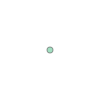

In [3]:
pt = Point({"x" : -118.15, "y" : 33.80, 
            "spatialReference" : {"wkid" : 4326}})
pt

In [4]:
pt.is_valid()

True

In [5]:
print(pt.is_empty)

False


In [6]:
print(pt.type)

Point


In [7]:
type(pt)

arcgis.geometry._types.Point

In [8]:
map0 = gis.map("Port of Long Beach")
map0.basemap = "satellite"
map0.zoom = 6
map0

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
pt_sym = {
    "type": "esriSMS",
    "style": "esriSMSDiamond",
    "color": [255,140,0,255],        
    "size": 14,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": {
        "color": [255,140,0,255],
        "width": 1}
}
map0.draw(pt, symbol=pt_sym)

The following code creates an invalid polyline (since validity checks are lazy)

In [10]:
line = {
  "paths" : [[[-97.06138],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline = Polyline(line)

In [11]:
print(polyline.spatialReference)

{'wkid': 4326}


In [12]:
print(polyline.is_valid())

False


In [13]:
map1 = gis.map()
map1.basemap = "dark-gray"
map1.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}
map1.zoom = 11.0
map1

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
map1.draw(polyline) # would not draw anything

Let's make a valid line now

In [15]:
line1 = {
  "paths" : [[[-97.06138,32.837],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline1 = Polyline(line1)
print(polyline1.is_valid())

True


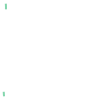

In [16]:
polyline1

In [17]:
map2 = gis.map()
map2.basemap = "dark-gray"
map2.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}
map2.zoom = 11.0
map2

MapView(layout=Layout(height='400px', width='100%'))

In [18]:
sym_poly_aoi = {
  "type": "esriSFS",
  "style": "esriSFSSolid",
  "color": [0,0,0,0],
    "outline": {
     "type": "esriSLS",
     "style": "esriSLSSolid",
     "color": [0,255,0,255],
     "width": 3}
}
map2.draw(polyline1, symbol = sym_poly_aoi)

Now let's make some polygons

In [19]:
polygon1 = Polygon({'spatialReference': {'latestWkid': 4326}, 
                'rings': [[[-97.06587202923951, 32.75656343500563], [-97.07033522518535, 32.75454232619796],
                           [-97.07179434702324, 32.75443405154119], [-97.073596791488, 32.75475887587208],
                           [-97.07501299810983, 32.75475887587208], [-97.07492716677937, 32.75616643554153],
                           [-97.07595713555828, 32.75602207118053], [-97.07115061698558, 32.75887321736912],
                           [-97.06930525730476, 32.75890930713694], [-97.06479914614289, 32.75739351976198],
                           [-97.06587202923951, 32.75656343500563]]]
                })

In [20]:
polygon1.is_valid()

True

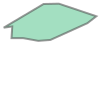

In [21]:
polygon1

In [42]:
map3 = gis.map()
map3.basemap = "topo"
map3.zoom = 16
map3.center = {'x': -97.05815464365813, 'y': 32.75494892021667, 
               "spatialReference" : {"wkid" : 4326}}
map3

MapView(layout=Layout(height='400px', width='100%'))

In [43]:
map3.draw(polygon1) # NOTE: not sure why this doesn't work

In [24]:
polygon1_proj = Polygon({'spatialReference': {'wkid': 3857}, 
                  'rings': [[[-10806331.461044524, 3862983.679353406], [-10806446.116586955, 3862964.5700963344], 
                             [-10805911.057388945, 3863341.9779235027], [-10805705.632875424, 3863346.7552377703], 
                             [-10805204.01487729, 3863146.1080385167], [-10805323.447733987, 3863036.229810354],  
                             [-10805820.288417853, 3862768.7002113485], [-10805982.717102963, 3862754.368268545], 
                             [-10806183.364302218, 3862797.3640969563], [-10806341.01567306, 3862797.3640969563], 
                             [-10806331.461044524, 3862983.679353406]]]
                })

In [25]:
map3_proj = gis.map()
map3_proj.basemap = "topo"
map3_proj.zoom = 16
map3_proj.center = {'x': -97.05815464365813, 'y': 32.75494892021667, 
               "spatialReference" : {"wkid" : 4326}}
map3_proj

MapView(layout=Layout(height='400px', width='100%'))

In [26]:
map3_proj.draw(polygon1_proj)

In [27]:
print("Geometry represented in JSON:\n", polygon1_proj.JSON, 
      "\n\nGeometry represented in WKB:\n", polygon1_proj.WKB, 
      "\n\nGeometry represented in WKT:\n", polygon1_proj.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-10806331.461044524, 3862983.679353406), (-10806446.116586955, 3862964.5700963344), (-10805911.057388945, 3863341.9779235027), (-10805705.632875424, 3863346.7552377703), (-10805204.01487729, 3863146.1080385167), (-10805323.447733987, 3863036.229810354), (-10805820.288417853, 3862768.7002113485), (-10805982.717102963, 3862754.368268545), (-10806183.364302218, 3862797.3640969563), (-10806341.01567306, 3862797.3640969563), (-10806331.461044524, 3862983.679353406)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00r\xe0\xc0n\x87\x9cd\xc1k\r\xf5\xd6\xe3xMA\x91\x14\xbb\xc3\x95\x9cd\xc1\xac\xea\xf8H\xdaxMAW!\xd6\xe1R\x9cd\xc1\xeb\x98,\xfd\x96yMA\xf6\x83@49\x9cd\xc1\x9a\xa1\xab`\x99yMA\xf0\xdfy\x80\xfa\x9bd\xc1\xc44\xd4\r5yMA:\xd6Sn\t\x9cd\xc1\xf9lj\x1d\xfexMA\x14\xb8:\x89G\x9cd\xc1\x85\x86\xa0YxxMA\xea\x81\xf2\xd6[\x9cd\xc1vl#/qxMA ]\xa8\xebt\x

In [28]:
geom1_reprojected = project(geometries = [polygon1_proj], in_sr = 3857, out_sr = 4326)[0]
geom1_reprojected.type

'Polygon'

In [29]:
print("Geometry represented in JSON:\n", geom1_reprojected.JSON, 
      "\n\nGeometry represented in WKB:\n", geom1_reprojected.WKB, 
      "\n\nGeometry represented in WKT:\n", geom1_reprojected.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-97.06587202923951, 32.75656343500563), (-97.07033522518535, 32.75454232619796), (-97.07179434702324, 32.75443405154119), (-97.073596791488, 32.75475887587208), (-97.07501299810983, 32.75475887587208), (-97.07492716677937, 32.75616643554153), (-97.07595713555828, 32.75602207118053), (-97.07115061698558, 32.75887321736912), (-97.06930525730476, 32.75890930713694), (-97.06479914614289, 32.75739351976198), (-97.06587202923951, 32.75656343500563)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@b\xfbP_\x80DX\xc0\xe7;\xcb\xd7\x94`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@\x83\

In [44]:
map3.draw(geom1_reprojected) # NOTE: this did work for some reasom though

In [31]:
print("Geometry represented in JSON:\n", polygon1.JSON, 
      "\n\nGeometry represented in WKB:\n", polygon1.WKB, 
      "\n\nGeometry represented in WKT:\n", polygon1.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-97.06587202923951, 32.75656343500563), (-97.07033522518535, 32.75454232619796), (-97.07179434702324, 32.75443405154119), (-97.073596791488, 32.75475887587208), (-97.07501299810983, 32.75475887587208), (-97.07492716677937, 32.75616643554153), (-97.07595713555828, 32.75602207118053), (-97.07115061698558, 32.75887321736912), (-97.06930525730476, 32.75890930713694), (-97.06479914614289, 32.75739351976198), (-97.06587202923951, 32.75656343500563)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@b\xfbP_\x80DX\xc0\xe7;\xcb\xd7\x94`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@\x83\

Let's look at some geometry properties:

In [32]:
polygon1_proj.centroid, geom1_reprojected.centroid

((-10805839.610595193, 3863047.3497144855),
 (-97.0705088053709, 32.756647420138925))

In [33]:
polygon1_proj.area, geom1_reprojected.area

(431509.386639783, 2.92840477522626e-05)

In [34]:
polygon1_proj.length, geom1_reprojected.length

(2955.798323907705, 0.025605496007056323)

In [35]:
print(polygon1_proj.extent)
print(geom1_reprojected.extent)

(-10806446.116586955, 3862754.368268545, -10805204.01487729, 3863346.7552377703)
(-97.07595713555828, 32.75443405154119, -97.06479914614289, 32.75890930713694)


In [36]:
print(polyline1.length)

0.009013286207273721


In [37]:
try:
    polygon1_proj_shapely_obj = polygon1_proj.as_shapely
    print(type(polygon1_proj_shapely_obj))
except OSError as e:
    print(e)

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [38]:
try:
    print(type(polygon1_proj.as_shapely))
except OSError as e:
    print(e)

<class 'shapely.geometry.multipolygon.MultiPolygon'>


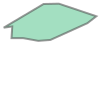

In [41]:
geom1_reprojected.as_shapely

In [40]:
pt._check_geometry_engine()

(False, True)

Creating geometries interactively using the map widget

In [57]:
map5 = gis.map()
map5.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8235706.664189668,
 'ymin': 4977993.551288029,
 'xmax': -8233351.448255569,
 'ymax': 4978949.014141619}
map5.basemap = 'satellite'
map5

MapView(layout=Layout(height='400px', width='100%'))

Computing length of drawn polyline...
Length: 1294.3037716046374 m.


In [58]:
# Define the callback function that computes the length.
drawn_line = None
def calc_dist(map1, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")
    print("Length: " + str(length[0]) + " m.")
    # update the geometry
    global drawn_line
    drawn_line = g

# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
drawn_line = map5.on_draw_end(calc_dist)

In [59]:
map5.draw("polyline")

In [60]:
drawn_line

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'paths': [[[-8235422.749895634, 4978323.932427872],
   [-8235148.054325228, 4978684.6196551025],
   [-8234835.140240677, 4978455.308570241],
   [-8235023.844154261, 4978082.678057341],
   [-8235425.138552768, 4978288.1025708625]]]}

In [61]:
map6 = gis.map()
map6.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8235706.664189668,
 'ymin': 4977993.551288029,
 'xmax': -8233351.448255569,
 'ymax': 4978949.014141619}
map6.basemap = 'satellite'
map6

MapView(layout=Layout(height='400px', width='100%'))

Computing area of drawn polygon...
Area (sr=3857): 235753.11189738504 sq m.
Area (sr=4326): 1.4408072635198254e-05 degrees


In [62]:
drawn_polygon = None
def calc_area(map1, g):
    print("Computing area of drawn polygon...")
    area0 = Polygon(g).area
    print("Area (sr=3857): " + str(area0) + " sq m.")
    area = project(geometries=[Polygon(g)], in_sr=g['spatialReference'], out_sr=4326)[0].area
    print("Area (sr=4326): " + str(area) + " degrees")
    global drawn_polygon
    drawn_polygon = g

# Set calc_dist as the callback function to be invoked when a polygon is drawn on the map
map6.on_draw_end(calc_area)

In [63]:
map6.draw("polygon")

In [64]:
drawn_polygon

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'rings': [[[-8235403.640638563, 4978352.59631348],
   [-8235401.251981429, 4978369.316913418],
   [-8235210.15941071, 4978675.065026566],
   [-8235117.001782485, 4978749.113397719],
   [-8235076.394611208, 4978768.222654792],
   [-8235076.394611208, 4978765.8339976575],
   [-8235071.617296941, 4978765.8339976575],
   [-8235040.564754198, 4978753.890711987],
   [-8235035.78743993, 4978753.890711987],
   [-8235031.010125662, 4978753.890711987],
   [-8235019.066839993, 4978746.724740586],
   [-8235009.512211457, 4978737.17011205],
   [-8234992.791611519, 4978725.22682638],
   [-8234985.625640118, 4978720.449512112],
   [-8234985.625640118, 4978715.672197844],
   [-8234976.071011581, 4978703.728912175],
   [-8234945.018468839, 4978687.0083122365],
   [-8234928.297868902, 4978675.065026566],
   [-8234923.520554634, 4978658.344426629],
   [-8234923.520554634, 4978653.567112361],
   [-8234918.743240366, 4978648.789798093],
   [-82349

In [65]:
type(drawn_polygon)

dict

# Extracting geometries from existing feature layers

### Get geometries from a spatially enabled DataFrame object

In [67]:
from arcgis.features import FeatureLayer

In [68]:
dc_fl = FeatureLayer('https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/10')
dc_df = pd.DataFrame.spatial.from_layer(dc_fl)
display(dc_df.head())

,OBJECTID,CITY_NAME,STATE_CITY,CAPITAL,WEB_URL,AREAKM,AREAMILES,Shape_Length,Shape_Area,SHAPE
0,1,Washington,1150000,Y,http://www.dc.gov,177.47,68.52,67608.276922,1.774562e+08,"{""rings"": [[[-8584936.334474642, 4712272.26069..."


In [69]:
type(dc_df.spatial)

arcgis.features.geo._accessor.GeoAccessor

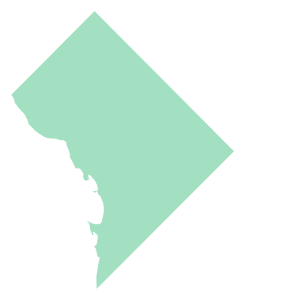

In [70]:
display(dc_df.spatial)

In [71]:
poly1 = dc_df.iloc[0].SHAPE
type(poly1)

arcgis.geometry._types.Polygon

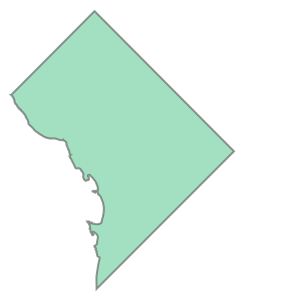

In [72]:
display(poly1)

<class 'arcgis.geometry._types.Polygon'>


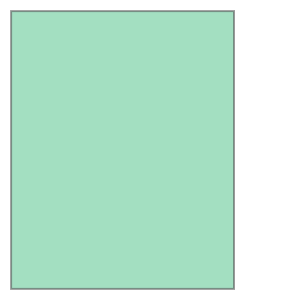

In [73]:
print(type(dc_df.spatial.bbox))
display(dc_df.spatial.bbox)

In [75]:
dc_map = gis.map('Washington DC')
dc_map

MapView(layout=Layout(height='400px', width='100%'))

In [76]:
dc_map.draw(dc_df.iloc[0].SHAPE, 
            symbol={
                      "type": "esriSFS",
                      "style": "esriSFSSolid",
                      "color": [115,76,0,255],
                        "outline": {
                         "type": "esriSLS",
                         "style": "esriSLSSolid",
                         "color": [110,110,110,255],
                         "width": 1}
                    })
dc_map.draw(dc_df.spatial.bbox)

### Get geometries from Feature objects

In [77]:
# tax incentives
pp_fl = FeatureLayer('https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/24')
pp_fset = pp_fl.query()
pp_fset

<FeatureSet> 98 features

In [78]:
pp_sdf = pp_fset.sdf
pp_sdf.head()

,OBJECTID,NAME,WEB_URL,Shape_Length,Shape_Area,FEDTRACTNO,TRACTNO,AREASQMI,POPDENSITY,TOTAL,TRACT_NAME,TRACT,GEOID,ACRES,ID,CITY,STATUS,SHAPE
0,1,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,3629.654865,7.690694e+05,19.01,19.1,0.296939,13524.645551,4016,2010 Tract 19.01,001901,11001001901,190.041207,15,Brightwood,Qualified,"{""rings"": [[[-8574620.698597332, 4717365.76244..."
1,2,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,3936.332156,7.871354e+05,88.04,88.4,0.303915,7936.437428,2412,2010 Tract 88.04,008804,11001008804,194.505405,80,Ivy City,Qualified,"{""rings"": [[[-8569465.936656462, 4707937.83407..."
2,3,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,2991.033699,2.994830e+05,89.03,89.3,0.115631,22770.708307,2633,2010 Tract 89.03,008903,11001008903,74.003848,87,Kingman Park,Qualified,"{""rings"": [[[-8569236.061578225, 4708392.59219..."
3,4,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,3952.278822,8.896368e+05,10.02,10.2,0.343491,10020.649467,3442,2010 Tract 10.02,001002,11001001002,219.834053,107,Mclean Gardens,Qualified,"{""rings"": [[[-8579661.69146017, 4712166.487627..."
4,5,Supermarket Tax Incentives,https://dmped.dc.gov/page/supermarket-tax-ince...,4800.866903,1.077533e+06,34,34,0.416038,10448.569315,4347,2010 Tract 34,003400,11001003400,266.264201,91,Ledroit Park,Qualified,"{""rings"": [[[-8573522.865645228, 4711365.69090..."


<class 'arcgis.features.geo._accessor.GeoAccessor'>


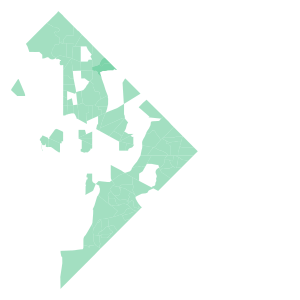

In [79]:
print(type(pp_sdf.spatial))
display(pp_sdf.spatial)

<class 'arcgis.geometry._types.Polygon'>


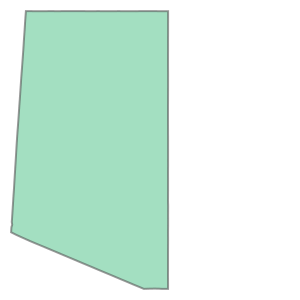

In [80]:
pp_sdf_row0 = pp_sdf.iloc[0].SHAPE
print(type(pp_sdf_row0))
display(pp_sdf_row0)

The rest seems less relevant to the project (it's mostly about creating FeatureLayers from geomrtries etc)